# **Analiza zmian klimatycznych metodami uczenia maszynowego**

// NAPISAĆ JAKIŚ WSTĘP

Import bibliotek:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg


Ustawienie opcji, które ułatwią czytelność dużych zbiorów danych.

In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## **Emisja CO2**


Pierwszym etapem niniejszej pracy jest przedstawienie danych w formie czytelnych wykresów odnośnie emisji CO2 w latach 1960 - 2019 dla całego świata i pojedyńczych państw, a także próba predykcji tych wartości dla lat późniejszych (2020 - 2100). Zostaną użyte i porównane różne algorytmy uczenia maszynowego takie jak:
- regresja liniowa
- regresja wielomianowa

a także metody statystyczne takie jak:
- autoregresja
- model ARIMA

Wyjaśnienie danych znajdujących się w pliku co2_emissions_kt_by_country.csv:

country_code: To kod kraju, który identyfikuje konkretny kraj.
country_name: To pełna nazwa kraju odpowiadająca kodowi kraju.
year: To rok, dla którego zgromadzono dane dotyczące emisji CO2.
value: To wartość emisji CO2 zgromadzona dla danego kraju i roku. Ta wartość wskazuje ilość CO2 emitowanego przez dany kraj w danym roku.

Wniosek z tych danych mógłby obejmować analizę trendów emisji CO2 w danym kraju lub regionie, porównanie poziomów emisji między różnymi krajami, zrozumienie wpływu polityk ekologicznych na poziomy emisji w poszczególnych krajach oraz prognozowanie przyszłych emisji CO2 na podstawie danych historycznych.

Wczytanie danych:

In [261]:
data_CO2 = pd.read_csv('co2_emissions_kt_by_country.csv')
print(data_CO2)

      country_code country_name  year    value
0              ABW        Aruba  1960 11092.67
1              ABW        Aruba  1961 11576.72
2              ABW        Aruba  1962 12713.49
3              ABW        Aruba  1963 12178.11
4              ABW        Aruba  1964 11840.74
...            ...          ...   ...      ...
13948          ZWE     Zimbabwe  2015 12430.00
13949          ZWE     Zimbabwe  2016 11020.00
13950          ZWE     Zimbabwe  2017 10340.00
13951          ZWE     Zimbabwe  2018 12380.00
13952          ZWE     Zimbabwe  2019 11760.00

[13953 rows x 4 columns]


Dane w tabeli reprezentują ilość CO2 wyemitowaną w danym roku dla różnych państw. Kolumna "value" zawiera ilość CO2 wyrażoną w kilotonach.

Łączna emisja CO2 wg. roku i kraju:

In [262]:
world_data = data_CO2[data_CO2['country_name'] == 'World']
usa_data = data_CO2[data_CO2['country_name'] == 'United States']
european_data = data_CO2[data_CO2['country_name'] == 'European Union']
china_data = data_CO2[data_CO2['country_name'] == 'China']
india_data = data_CO2[data_CO2['country_name'] == 'India']
russia_data = data_CO2[data_CO2['country_name'] == 'Russian Federation']
poland_data = data_CO2[data_CO2['country_name'] == 'Poland']

world_co2_by_year = world_data.groupby('year')['value'].sum()
usa_co2_by_year = usa_data.groupby('year')['value'].sum()
european_co2_by_year = european_data.groupby('year')['value'].sum()
china_co2_by_year = china_data.groupby('year')['value'].sum()
india_co2_by_year = india_data.groupby('year')['value'].sum()
russia_co2_by_year = russia_data.groupby('year')['value'].sum()
poland_co2_by_year = poland_data.groupby('year')['value'].sum()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

total_co2_by_year = world_co2_by_year

print(total_co2_by_year)

year
1960    9463838.50
1961    9423934.42
1962    9732505.89
1963   10274503.99
1964   10820253.01
1965   11402575.20
1966   11988321.42
1967   12413351.89
1968   13087346.57
1969   13976005.56
1970   15272289.24
1971   15913710.78
1972   16680140.79
1973   17582029.20
1974   17563629.93
1975   17641960.09
1976   18580873.04
1977   19183226.42
1978   19921141.71
1979   20459807.60
1980   20396427.12
1981   19879068.57
1982   19815965.25
1983   20034812.12
1984   20636636.76
1985   21429383.16
1986   21729229.48
1987   22365639.63
1988   23289432.35
1989   23699896.02
1990   20625272.97
1991   20766900.89
1992   20796958.43
1993   20937123.28
1994   21052949.10
1995   21652838.85
1996   22110607.51
1997   22492054.36
1998   22613709.04
1999   22720117.59
2000   23445433.27
2001   23845771.45
2002   24165261.26
2003   25285349.24
2004   26434355.26
2005   27414328.02
2006   28302931.66
2007   29368779.20
2008   29595752.40
2009   29267375.19
2010   31043476.98
2011   32021108.26
2012   

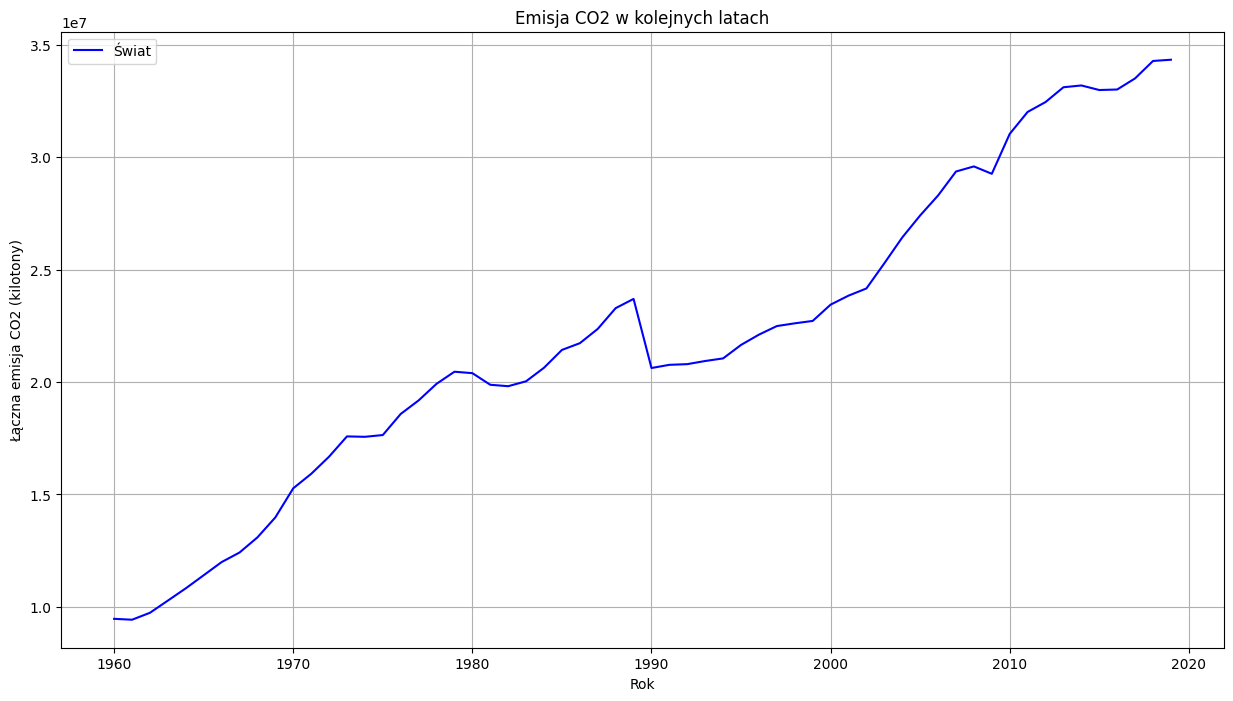

In [263]:
plt.figure(figsize=(15, 8))
plt.plot(total_co2_by_year.index, total_co2_by_year.values, label='Świat', color='blue')


plt.title('Emisja CO2 w kolejnych latach')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

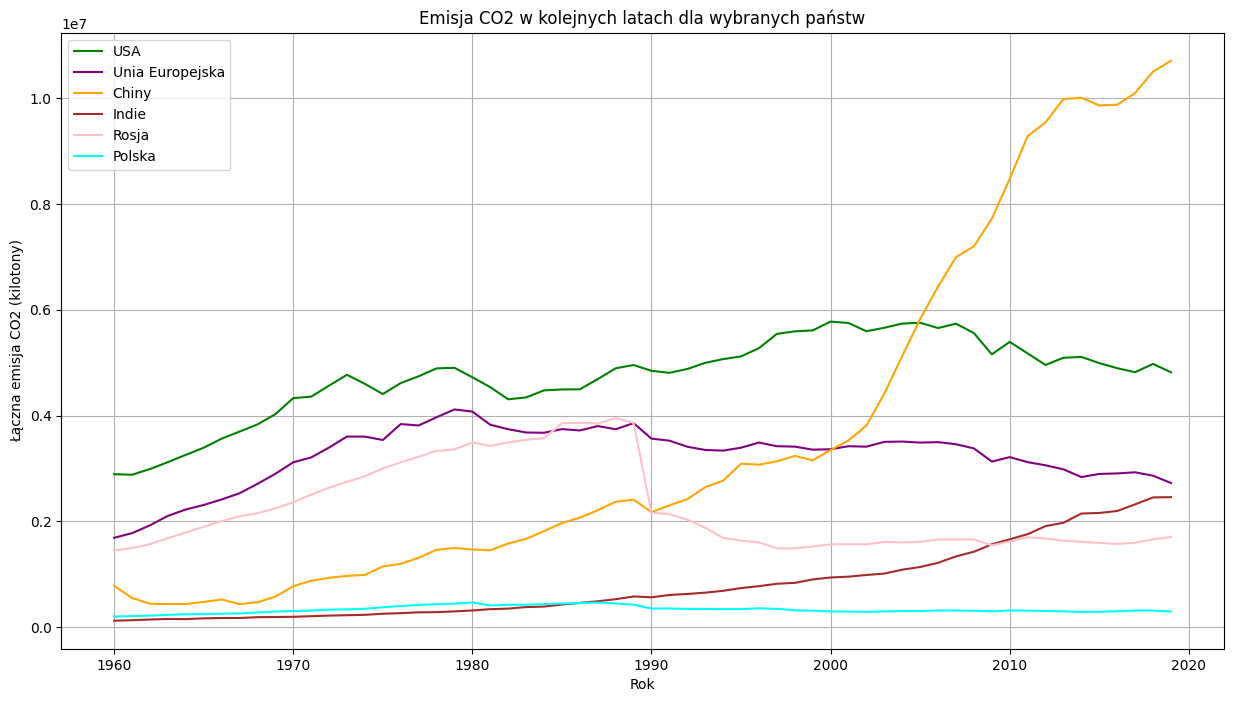

In [264]:
plt.figure(figsize=(15, 8))

plt.plot(usa_co2_by_year.index, usa_co2_by_year.values, label='USA', color='green')
plt.plot(european_co2_by_year.index, european_co2_by_year.values, label='Unia Europejska', color='purple')
plt.plot(china_co2_by_year.index, china_co2_by_year.values, label='Chiny', color='orange')
plt.plot(india_co2_by_year.index, india_co2_by_year.values, label='Indie', color='brown')
plt.plot(russia_co2_by_year.index, russia_co2_by_year.values, label='Rosja', color='pink')
plt.plot(poland_co2_by_year.index, poland_co2_by_year.values, label='Polska', color='cyan')

plt.title('Emisja CO2 w kolejnych latach dla wybranych państw')
plt.xlabel('Rok')
plt.ylabel('Łączna emisja CO2 (kilotony)')
plt.legend()
plt.grid(True)
plt.show()

Próba predykcji emisji CO2 dla *całego świata* metodą **regresji liniowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


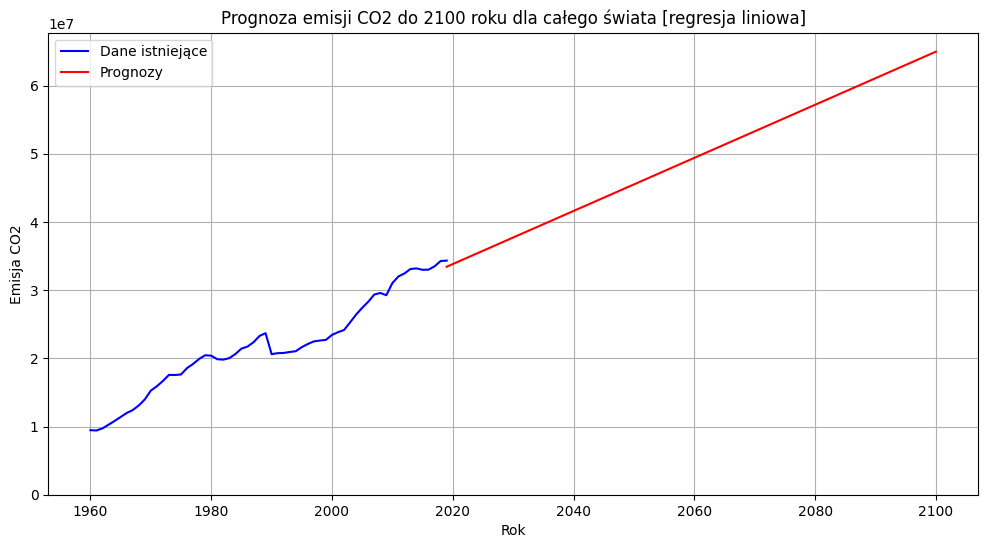

Metryka R2 dla danych trenowanych: 0.94


In [265]:

X = world_data[['year']]
y = world_data['value']


model = LinearRegression()
model.fit(X, y)

r2_train = model.score(X, y)

future_years = [[year] for year in range(2019, 2101)]
future_predictions = model.predict(future_years)

plt.figure(figsize=(12, 6))
plt.plot(world_data['year'], world_data['value'], color='blue', label='Dane istniejące')
plt.plot(range(2019, 2101), future_predictions, color='red', label='Prognozy')

plt.title('Prognoza emisji CO2 do 2100 roku dla całego świata [regresja liniowa]')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.show()

print('Metryka R2 dla danych trenowanych:',round(r2_train,2))

Próba predykcji emisji CO2 dla *wybranego państwa* metodą **regresji liniowej**

In [266]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    data_country = data[data['country_name'] == panstwo]

    X = data_country[['year']]
    y = data_country['value']


    model = LinearRegression()
    model.fit(X, y)

    r2_train = model.score(X, y)

    future_years = [[year] for year in range(2019, 2101)]
    future_predictions = model.predict(future_years)

    plt.figure(figsize=(12, 6))
    plt.plot(data_country['year'], data_country['value'], color='blue', label='Dane istniejące')
    plt.plot(range(2019, 2101), future_predictions, color='red', label='Prognozy')

    plt.title('Prognoza emisji CO2 do 2100 roku dla ' + panstwo + ' [regresja liniowa]')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.legend()
    plt.grid(True)
    plt.show()

    print('Metryka R2 dla danych trenowanych:',round(r2_train,2))
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery


Należy oczywiście wziąść pod uwagę, że regresja liniowa jest prostym modelem, który zakłada liniową zależność między zmiennymi. Jednak emisje CO2 mogą podlegać wpływowi wielu skomplikowanych czynników, takich jak technologiczny postęp, polityka rządowa i zmieniające się wzorce konsumpcji. Rządy prawdopodobnie będą kontynuować wysiłki w kierunku ograniczenia emisji CO2, co może wpłynąć na przyszłe trendy. Dlatego aby tego typu prognozy były jak najbardziej rzetelne powinno się monitorować i brać pod uwagę inne czynniki, by prognozy te były jak najbardziej rzetelne.

Próba predykcji emisji CO2 dla *całego świata* metodą **regresji wielomianowej**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


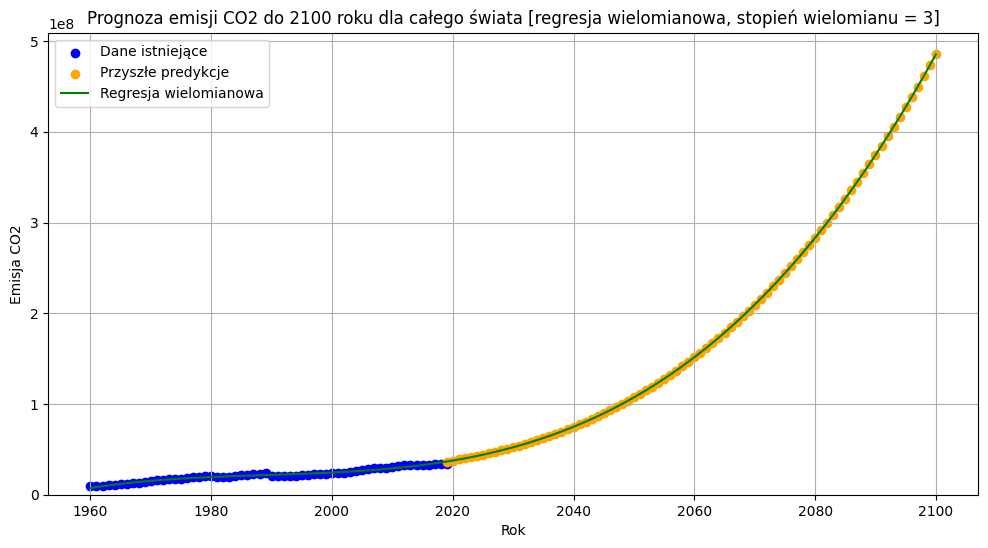

Metryka R2 dla trenowanych danych: 0.97


In [267]:
X = world_data[['year']]
y = world_data['value'].values


poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

r2_train = r2_score(y_train, y_pred_train)

future_years = [[year] for year in range(2019, 2101)]
future_years_poly = poly_features.transform(future_years)
future_emission = model.predict(future_years_poly)

X_range = np.concatenate((X, future_years), axis=0)
X_range_poly = poly_features.transform(X_range)


plt.figure(figsize=(12, 6))
plt.title('Prognoza emisji CO2 do 2100 roku dla całego świata [regresja wielomianowa, stopień wielomianu = 3]')
plt.scatter(X, y, color='blue', label='Dane istniejące')
plt.scatter(future_years, future_emission, color='orange', label='Przyszłe predykcje')  
plt.plot(X_range, model.predict(X_range_poly), color='green', label='Regresja wielomianowa')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.grid(True)
plt.legend()
plt.show()

print(f"Metryka R2 dla trenowanych danych: {round(r2_train,2)}")


In [268]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    degree = int(input("Podaj stopień wielomianu"))
    data_country = data[data['country_name'] == panstwo]

    X = data_country[['year']]
    y = data_country['value'].values

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)

    r2_train = r2_score(y_train, y_pred_train)

    future_years = [[year] for year in range(2019, 2101)]
    future_years_poly = poly_features.transform(future_years)
    future_emission = model.predict(future_years_poly)

    X_range = np.concatenate((X, future_years), axis=0)
    X_range_poly = poly_features.transform(X_range)

    plt.figure(figsize=(12, 6))
    plt.title('Prognoza emisji CO2 do 2100 roku dla '+ panstwo + ' [regresja wielomianowa, stopień wielomianu = '+ str(degree) + ']')
    plt.scatter(X, y, color='blue', label='Dane istniejące')
    plt.scatter(future_years, future_emission, color='orange', label='Przyszłe predykcje')  
    plt.plot(X_range, model.predict(X_range_poly), color='green', label='Regresja wielomianowa')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Metryka R2 dla trenowanych danych: {round(r2_train,2)}")
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery


Dane z regresji liniowej przewidują bardziej optymystyczny scenariusz w którym to do roku 2100 przewidywana emisja dla całego świata będzie cały rząd wielkości mniejsza, niż za pomocą regresji wielomianowej. Różnice między przewidywaniami regresji liniowej, a wielomianowej mogą wynikać z ograniczeń liniowego modelu, który zakłada stałą, jednostajną zmianę na przestrzeni lat. W przypadku zjawisk złożonych, takich jak emisja CO2, regresja wielomianowa jest bardziej elastyczna i może lepiej odzwierciedlać nieliniowe wzorce, co czasami prowadzi do bardziej realistycznych prognoz. Jednak i tak należy wziąść pod uwagę, iż modele te operują tylko na dostarczonych danych liczbowych, nie są więc w stanie wziąść pod uwagę wysiłku rządów w celu ograniczania tejże emisji.

Próba predykcji emisji CO2 dla całego świata za pomocą **autoregresji**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


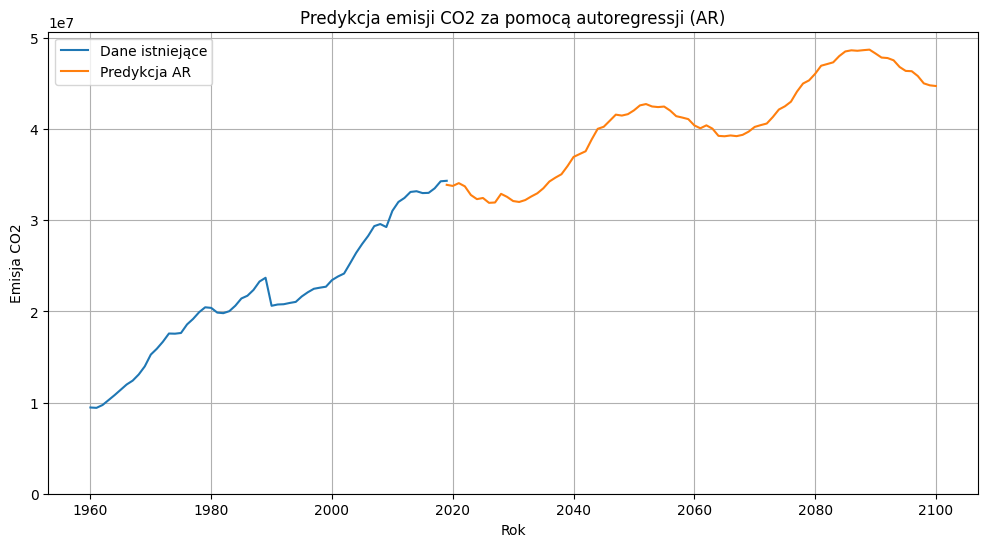

In [269]:
X = world_data['year']
y = world_data['value']

model = AutoReg(y, lags=22)  # parametr lags - liczba opóźnień, określa, o ile kroków wstecz w historii danych model będzie sięgał, aby przewidzieć aktualną wartość ,zbyd duza - nadmierne dopasowanie, zbyt mala - zbyt prosty model
model_fit = model.fit()


future_years = np.arange(2019, 2101)
future_emission = model_fit.predict(start=len(y), end=len(y)+len(future_years)-1)

plt.figure(figsize=(12, 6))
plt.plot(X, y, '-', label='Dane istniejące')
plt.plot(future_years, future_emission, '-', label='Predykcja AR')
plt.title('Predykcja emisji CO2 za pomocą autoregressji (AR)')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.show()

In [270]:
try:
    panstwo = input("Podaj nazwę państwa dla którego ma być dokonana predykcja:")
    lags = int(input("Podaj liczbę opóźnień"))

    data_country = data[data['country_name'] == panstwo]

    X = data_country['year']
    y = data_country['value']

    model = AutoReg(y, lags=lags)  # parametr lags - liczba opóźnień, określa, o ile kroków wstecz w historii danych model będzie sięgał, aby przewidzieć aktualną wartość ,zbyd duza - nadmierne dopasowanie, zbyt mala - zbyt prosty model
    model_fit = model.fit()


    future_years = np.arange(2019, 2101)
    future_emission = model_fit.predict(start=len(y), end=len(y)+len(future_years)-1)

    plt.figure(figsize=(12, 6))
    plt.plot(X, y, '-', label='Dane istniejące')
    plt.plot(future_years, future_emission, '-', label='Predykcja AR')
    plt.title('Predykcja emisji CO2 za pomocą autoregressji (AR)')
    plt.xlabel('Rok')
    plt.ylabel('Emisja CO2')
    plt.ylim(0, None)
    plt.legend()
    plt.grid(True)
    plt.show()
except:
    print("Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery")

Nie ma takiego państwa, tylko angielskie nazwy z wielkiej litery


Próba predykcji emisji CO2 dla całego świata za pomocą **modelu ARIMA**

C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kubar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCac

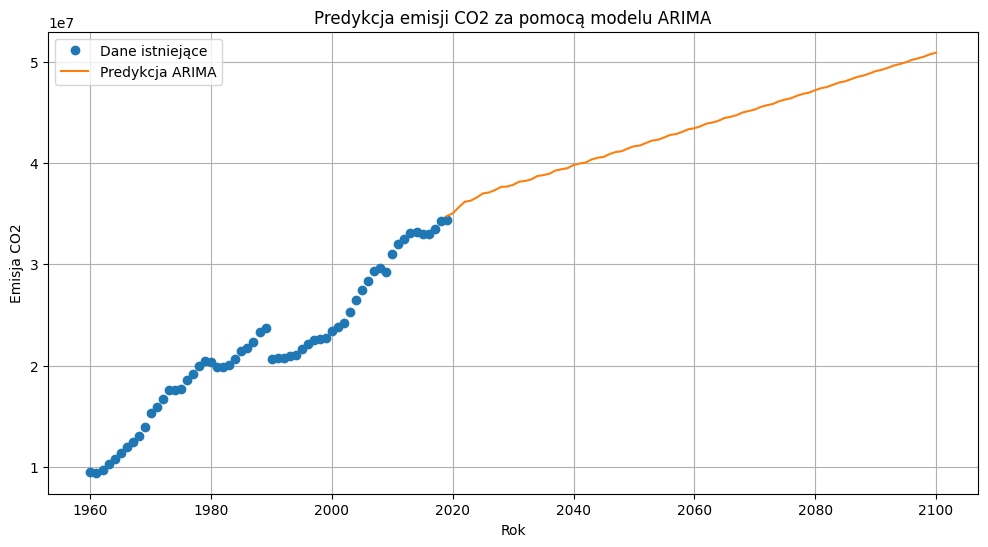

In [271]:


X = world_data[['year']]
y = world_data['value']


model = ARIMA(y, order=(4,2,10))  ########################## parametry p,d i q - ZORIENTOWAĆ SIĘ JAK JE SIĘ DOBIERA ######################################
model_fit = model.fit()

future_years = np.arange(2019, 2101)
future_emission = model_fit.forecast(steps=len(future_years))

# Wykres
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'o', label='Dane istniejące')
plt.plot(future_years, future_emission, '-', label='Predykcja ARIMA')
plt.title('Predykcja emisji CO2 za pomocą modelu ARIMA')
plt.xlabel('Rok')
plt.ylabel('Emisja CO2')
plt.legend()
plt.grid(True)
plt.show()




// DOKOŃCYĆ ARIMA


## **Globalny poziom morza**

Następny zestaw danych do analizy dotyczy pomiarów poziomu morza w latach 1993 - 2021. 

Plik sealevel.csv zawiera następujące cechy:

Year: Rok pomiaru. 

TotalWeightedObservations: Suma obserwacji ważonych.

GMSL_noGIA: Globalny poziom morza (Global Mean Sea Level) bez korekty związanej z działalnością lądolodów (Glacial Isostatic Adjustment - GIA). Jest to średnia wysokość poziomu morza w [mm] na całym świecie w stosunku do określonego odniesienia, nie uwzględniając wpływu zmian masy lądolodów.

StdDevGMSL_noGIA: Odchylenie standardowe globalnego poziomu morza bez korekty GIA. Wskazuje ono na zmienność w wysokości poziomu morza w ciągu danego roku.

SmoothedGSML_noGIA: Wygładzony globalny poziom morza bez korekty GIA. 

GMSL_GIA: Globalny poziom morza z uwzględnieniem korekty GIA. Korekta GIA uwzględnia wpływ zmian masy lądolodów na wysokość poziomu morza.

StdDevGMSL_GIA: Odchylenie standardowe globalnego poziomu morza z uwzględnieniem korekty GIA.

SmoothedGSML_GIA: Wygładzony globalny poziom morza z uwzględnieniem korekty GIA.

SmoothedGSML_GIA_sigremoved: Wygładzony globalny poziom morza z uwzględnieniem korekty GIA, z usuniętymi sygnałami, które nie są istotne z punktu widzenia analizy lub nieodpowiednio wyznaczonymi.


Wczytanie danych:

In [72]:
data_sealevel = pd.read_csv('sealevel.csv')
data_sealevel.head(10)

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
0,1993,327401.31,-38.59,89.86,-38.76,-38.59,89.86,-38.75,-38.57
1,1993,324498.41,-41.97,90.86,-39.78,-41.97,90.86,-39.77,-39.11
2,1993,333018.19,-41.93,87.27,-39.62,-41.91,87.27,-39.61,-38.58
3,1993,297483.19,-42.67,90.75,-39.67,-42.65,90.74,-39.64,-38.34
4,1993,321635.81,-37.86,90.26,-38.75,-37.83,90.25,-38.72,-37.21
5,1993,291945.91,-36.09,89.99,-37.71,-36.05,89.99,-37.67,-35.98
6,1993,327830.00,-36.11,88.74,-36.85,-36.06,88.74,-36.81,-34.94
7,1993,326320.41,-35.52,89.49,-36.32,-35.47,89.49,-36.27,-34.19
8,1993,322331.00,-35.47,88.79,-36.11,-35.41,88.78,-36.05,-33.72
9,1993,331127.31,-39.25,98.10,-36.17,-39.19,98.09,-36.11,-33.48


Liczba obserwacji w danym roku

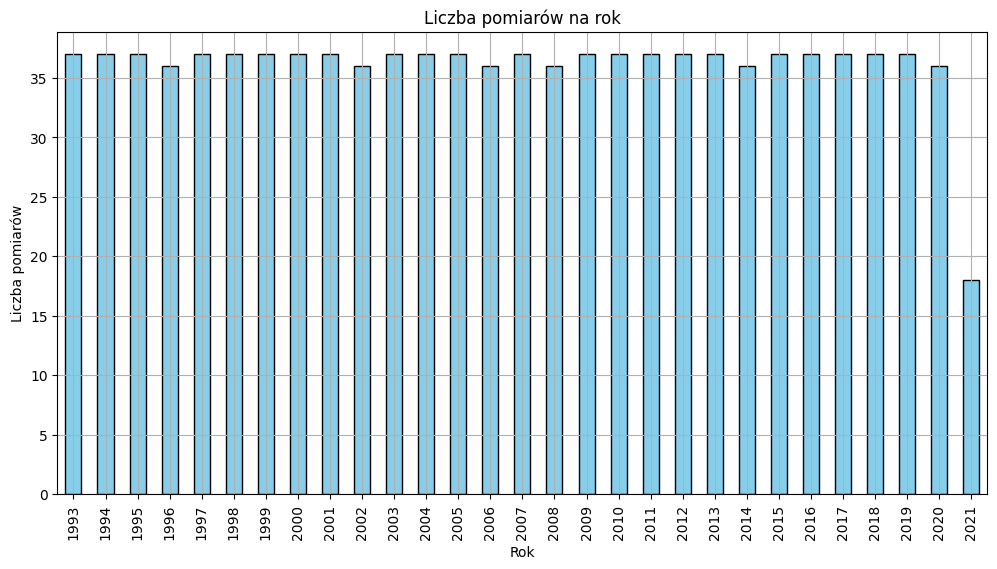

In [61]:
plt.figure(figsize=(12, 6))
data_sealevel.Year.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Liczba pomiarów na rok')
plt.xlabel('Rok')
plt.ylabel('Liczba pomiarów')
plt.grid(True)
plt.show()


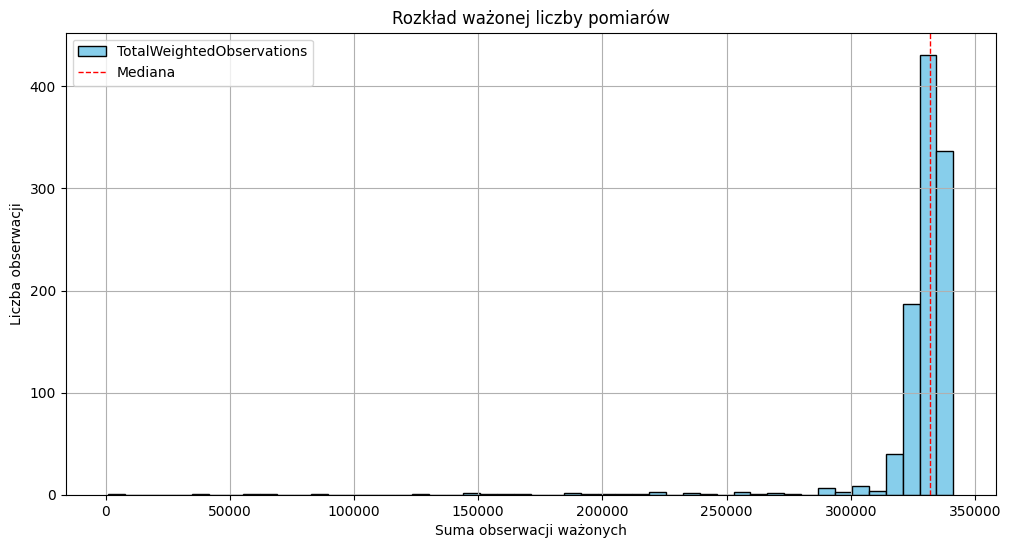

In [58]:
plt.figure(figsize=(12, 6))
data_sealevel.TotalWeightedObservations.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.axvline(data_sealevel.TotalWeightedObservations.median(), color='red', linestyle='dashed', linewidth=1, label='Mediana')
plt.title('Rozkład ważonej liczby pomiarów')
plt.xlabel('Suma obserwacji ważonych')
plt.ylabel('Liczba obserwacji')
plt.legend()
plt.grid(True)
plt.show()

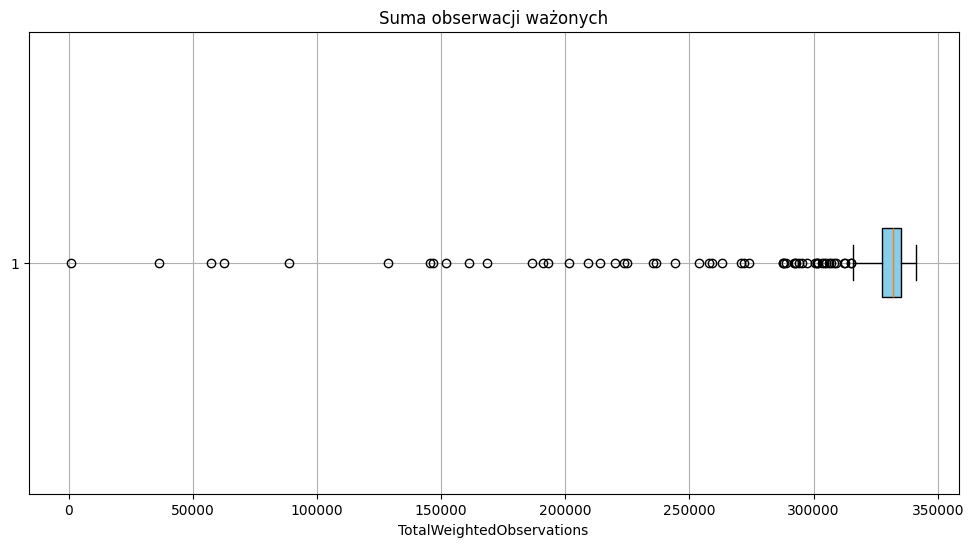

In [66]:
plt.figure(figsize=(12, 6))
plt.boxplot(data_sealevel.TotalWeightedObservations, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Suma obserwacji ważonych')
plt.xlabel('TotalWeightedObservations')
plt.grid(True)
plt.show()


Usunięcie obserwacji odstającej

In [74]:
data_sealevel[data_sealevel.TotalWeightedObservations<25000]

,Year,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
107,1995,906.1,-44.39,77.41,-25.34,-43.14,77.42,-24.63,-26.87


In [75]:
data_sealevel = data_sealevel[data_sealevel.TotalWeightedObservations>25000]

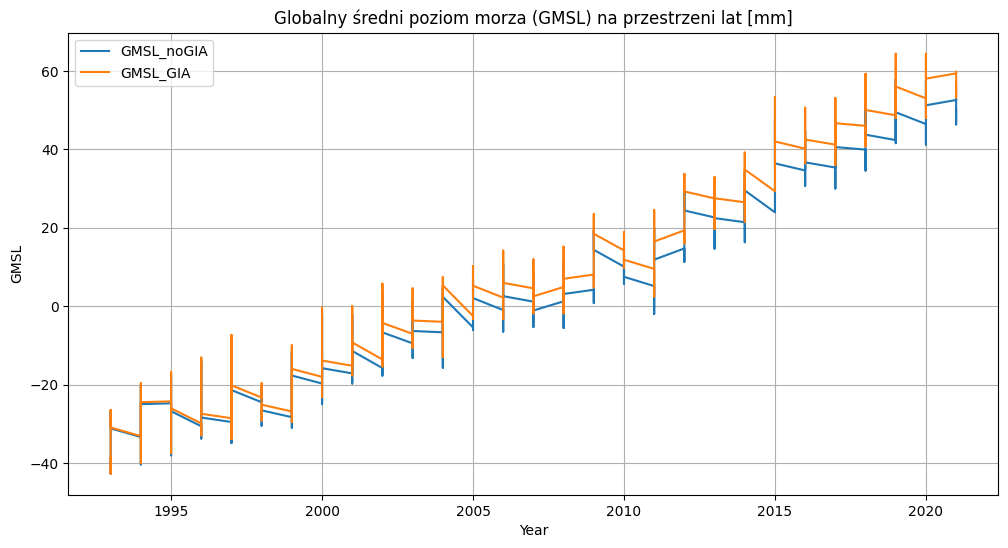

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(data_sealevel['Year'], data_sealevel['GMSL_noGIA'], label='GMSL_noGIA')
plt.plot(data_sealevel['Year'], data_sealevel['GMSL_GIA'], label='GMSL_GIA')
plt.xlabel('Year')
plt.ylabel('GMSL')
plt.title('Globalny średni poziom morza (GMSL) na przestrzeni lat [mm]')
plt.legend()
plt.grid(True)
plt.show()

Statystyki opisowe

In [76]:
print("\nStatystyki opisowe dla kolumny GMSL_noGIA:")
print(data_sealevel['GMSL_noGIA'].describe())

print("\nStatystyki opisowe dla kolumny GMSL_GIA:")
print(data_sealevel['GMSL_GIA'].describe())


Statystyki opisowe dla kolumny GMSL_noGIA:
count    1047.00000
mean        4.69235
std        26.31992
min       -42.67000
25%       -18.21000
50%         1.94000
75%        25.86500
max        57.92000
Name: GMSL_noGIA, dtype: float64

Statystyki opisowe dla kolumny GMSL_GIA:
count    1047.000000
mean        8.161509
std        28.279258
min       -42.650000
25%       -16.605000
50%         5.550000
75%        30.945000
max        64.390000
Name: GMSL_GIA, dtype: float64


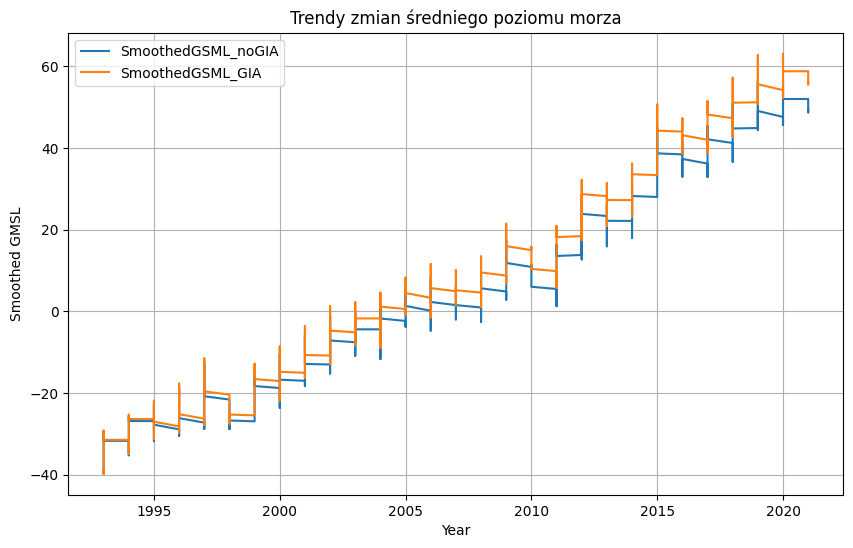

In [79]:
plt.figure(figsize=(10, 6))
plt.plot(data_sealevel['Year'], data_sealevel['SmoothedGSML_noGIA'], label='SmoothedGSML_noGIA')
plt.plot(data_sealevel['Year'], data_sealevel['SmoothedGSML_GIA'], label='SmoothedGSML_GIA')
plt.xlabel('Year')
plt.ylabel('Smoothed GMSL')
plt.title('Trendy zmian średniego poziomu morza')
plt.legend()
plt.grid(True)
plt.show()

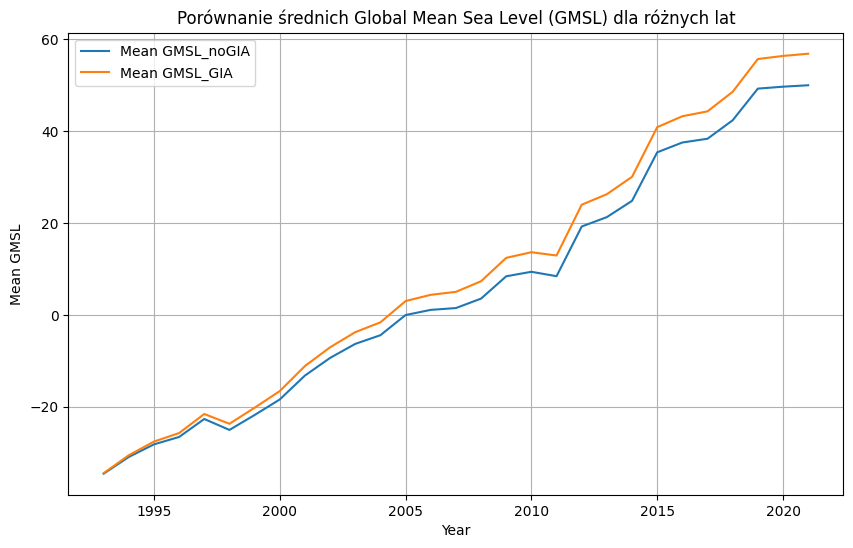

In [80]:
mean_gmsl_noGIA = data_sealevel.groupby('Year')['GMSL_noGIA'].mean()
mean_gmsl_GIA = data_sealevel.groupby('Year')['GMSL_GIA'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mean_gmsl_noGIA.index, mean_gmsl_noGIA.values, label='Mean GMSL_noGIA')
plt.plot(mean_gmsl_GIA.index, mean_gmsl_GIA.values, label='Mean GMSL_GIA')
plt.xlabel('Year')
plt.ylabel('Mean GMSL')
plt.title('Porównanie średnich globalnego poziomu morza (GMSL) dla różnych lat')
plt.legend()
plt.grid(True)
plt.show()

R2 dla regresji liniowej: 0.9478215456552407
R2 dla regresji wielomianowej: 0.9573563573935061


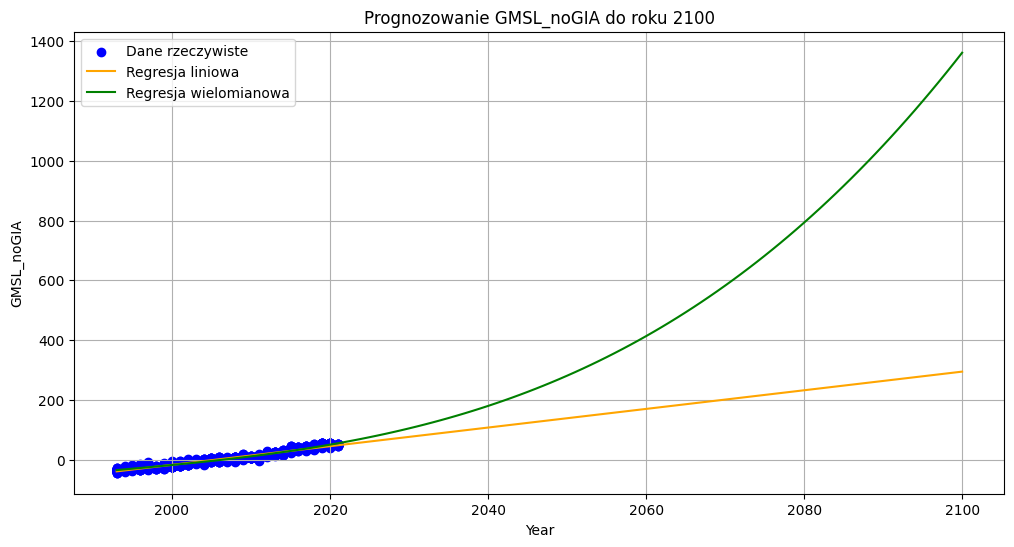

In [90]:
X_future = np.arange(1993, 2101).reshape(-1, 1)

lin_pred_future = lin_reg.predict(X_future)

X_poly_future = poly_features.transform(X_future)
poly_pred_future = poly_reg.predict(X_poly_future)

plt.figure(figsize=(12, 6))

plt.scatter(data_sealevel['Year'], data_sealevel['GMSL_noGIA'], label='Dane rzeczywiste', color='blue')

plt.plot(X_future, lin_pred_future, label='Regresja liniowa', color='orange')
plt.plot(X_future, poly_pred_future, label='Regresja wielomianowa', color='green')

plt.xlabel('Year')
plt.ylabel('GMSL_noGIA')
plt.title('Prognozowanie GMSL_noGIA do roku 2100')
plt.legend()
plt.grid(True)

r2_lin = r2_score(data_sealevel['GMSL_noGIA'], lin_reg.predict(data_sealevel['Year'].values.reshape(-1, 1)))
r2_poly = r2_score(data_sealevel['GMSL_noGIA'], poly_reg.predict(poly_features.transform(data_sealevel['Year'].values.reshape(-1, 1))))

print(f'R2 dla regresji liniowej: {r2_lin}')
print(f'R2 dla regresji wielomianowej: {r2_poly}')


plt.show()



//DODAĆ OPIS

## **Średnia temperatura w poszczególnych państwach w latach 1743 - 2013**

// OPIS DANYCH

Wczytanie danych:

In [88]:
data_temperature = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
print(data_temperature.head(10))



           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
5  1744-04-01               1.530                          4.680   Åland
6  1744-05-01               6.702                          1.789   Åland
7  1744-06-01              11.609                          1.577   Åland
8  1744-07-01              15.342                          1.410   Åland
9  1744-08-01                 NaN                            NaN   Åland


Mamy dużą liczbę wartości pustych zwłaszcza w danych z XVIII i XIX w. można więc usunąć wartości puste.

In [89]:
data_temperature = data_temperature.dropna()
print(data_temperature.head(10))

            dt  AverageTemperature  AverageTemperatureUncertainty Country
0   1743-11-01               4.384                          2.294   Åland
5   1744-04-01               1.530                          4.680   Åland
6   1744-05-01               6.702                          1.789   Åland
7   1744-06-01              11.609                          1.577   Åland
8   1744-07-01              15.342                          1.410   Åland
10  1744-09-01              11.702                          1.517   Åland
11  1744-10-01               5.477                          1.862   Åland
12  1744-11-01               3.407                          1.425   Åland
13  1744-12-01              -2.181                          1.641   Åland
14  1745-01-01              -3.850                          1.841   Åland


Można by wybrać Państwo i miesiąc dla którego przeprowadzano pomiary, następnie zwizualizować dane.
Poniższe dwa wykresy przedstawiają średnią temperature dla danego państwa, a także niepewności pomiarowe i regresje liniową, która rezprezentuje linie trendu.

C:\Users\kubar\AppData\Local\Temp\ipykernel_13940\2789810756.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_temperature['dt'] = pd.to_datetime(country_temperature['dt'])
C:\Users\kubar\AppData\Local\Temp\ipykernel_13940\2789810756.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_temperature['Year'] = country_temperature['dt'].dt.year


    Rok  Przewidywana temperatura (°C)
0  1850                      -2.280288
1  1900                      -2.038740
2  1950                      -1.613481
3  2000                      -0.978006
4  2050                      -0.105815
5  2100                       1.029595


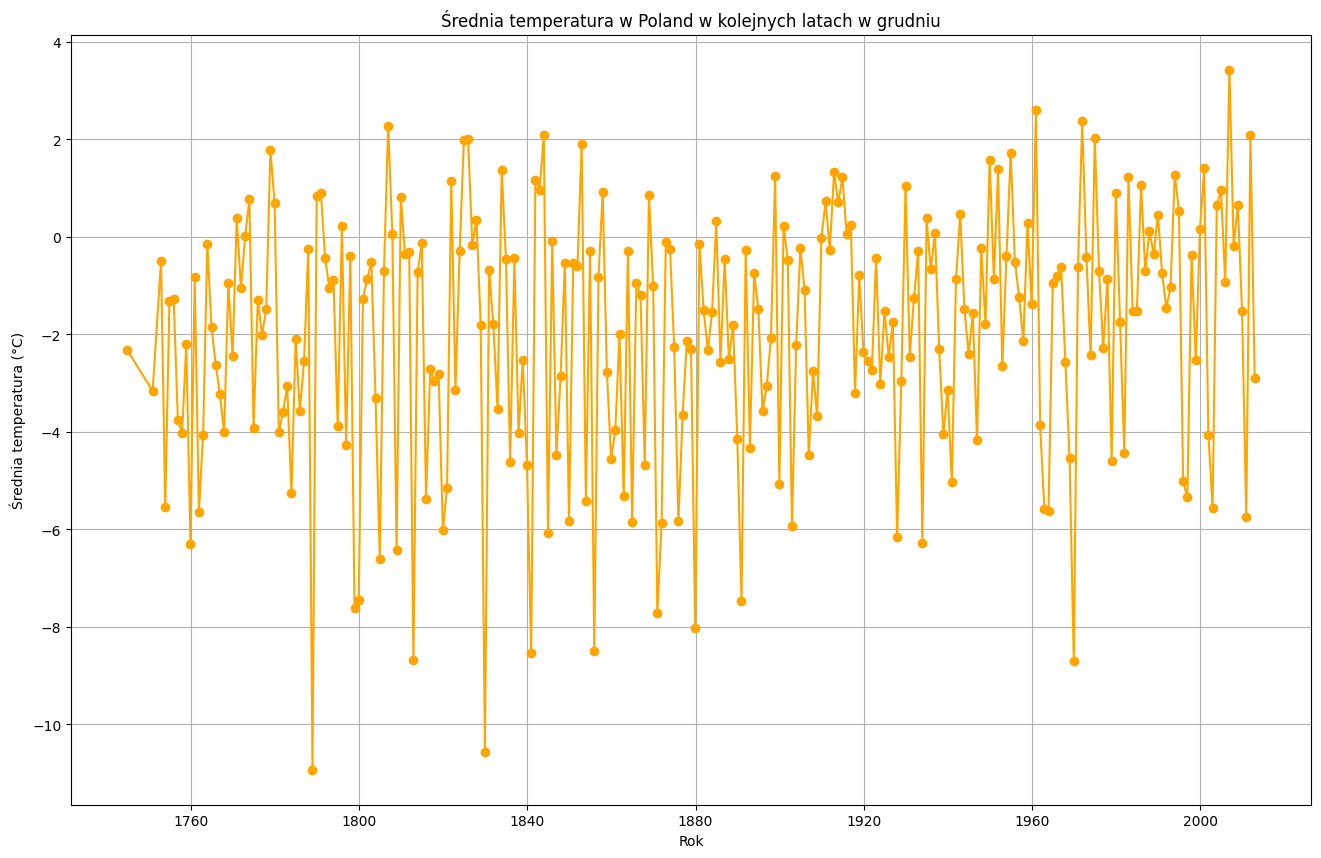

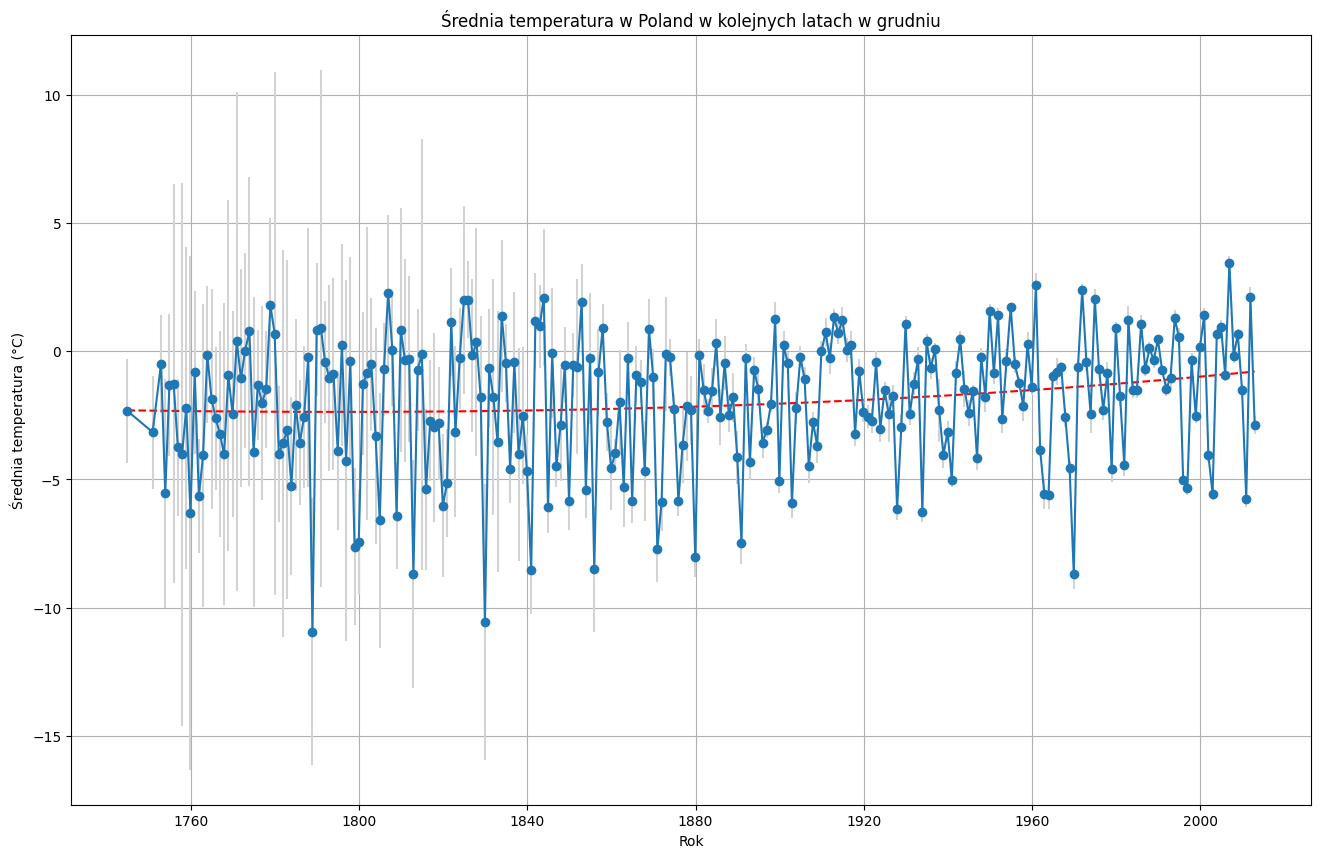

In [108]:

try:
    data_temperature['dt'] = pd.to_datetime(data_temperature['dt'])
    month = int(input("Podaj miesiąc pomiarów (1 - 12): "))
    country_name = input("Podaj państwo dla którego chcesz uzyskać dane odnośnie temperatury: ")
    country_temperature = data_temperature[(data_temperature['dt'].dt.month == month) & (data_temperature['Country'] == country_name)]

    month_name = ['styczniu', 'lutym', 'marcu', 'kwietniu', 'maju', 'czerwcu', 'lipcu', 'sierpniu', 'wrześniu', 'październiku', 'listopadzie', 'grudniu']

    country_temperature['dt'] = pd.to_datetime(country_temperature['dt'])


    country_temperature['Year'] = country_temperature['dt'].dt.year

    
    trend_line_calculate = np.polyfit(country_temperature['Year'], country_temperature['AverageTemperature'], 3)
    trend_line_calcualte_fn = np.poly1d(trend_line_calculate)

    temperature_1850 = trend_line_calcualte_fn(1850)
    temperature_1900 = trend_line_calcualte_fn(1900)
    temperature_1950 = trend_line_calcualte_fn(1950)
    temperature_2000 = trend_line_calcualte_fn(2000)
    temperature_2050 = trend_line_calcualte_fn(2050)
    temperature_2100 = trend_line_calcualte_fn(2100)

    trend_line_draw = np.polyfit(country_temperature.index, country_temperature['AverageTemperature'], 3)
    trend_line_draw_fn = np.poly1d(trend_line_draw)

    predictions = pd.DataFrame({'Rok': [1850, 1900, 1950, 2000, 2050, 2100],'Przewidywana temperatura (°C)': [temperature_1850, temperature_1900, temperature_1950, temperature_2000, temperature_2050, temperature_2100]})
    print(predictions)

    plt.figure(figsize=(16, 10))
    plt.plot(country_temperature['dt'], country_temperature['AverageTemperature'], marker='o', linestyle='-',color='orange')
    plt.title('Średnia temperatura w ' + country_name + ' w kolejnych latach w ' + month_name[month-1])
    plt.xlabel('Rok')
    plt.ylabel('Średnia temperatura (°C)')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.errorbar(country_temperature['dt'], country_temperature['AverageTemperature'], yerr=country_temperature['AverageTemperatureUncertainty'], marker='o', linestyle='-', label='Średnia temperatura', ecolor='lightgray')
    plt.plot(country_temperature['dt'], trend_line_draw_fn(country_temperature.index), linestyle='--', color='red', label='Linia trendu')
    plt.title('Średnia temperatura w ' + country_name + ' w kolejnych latach w ' + month_name[month-1])
    plt.xlabel('Rok')
    plt.ylabel('Średnia temperatura (°C)')
    plt.grid(True)
    plt.show()

    
except:
    print("Wystąpił błąd. Upewnij się, że nazwa państwa (duża litera i angielska nazwa) oraz miesiąc (liczba 1 - 12) są poprawne.")


## **Stopień zalesienia danego państwa**

//Analiza danych zestawionych, można by spojrzeć na korlacje między np. emisją CO2 a zaesieniem lub temperaturą itp.